In [21]:
import numpy as np
import pandas as pd
# im
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatch

In [22]:
np.random.seed(0)
n=100
m=2


def plot_data(X,y,colors,xlab,ylab,title='Closed form solution',pltobj=None):
    colors_=['red' if val==1 else 'blue' for val in colors]
    # xlabel='X'
    # ylabel='y'
    if pltobj is None:
        pltobj=plt
        # pltobj.scatter(X,y)
        pltobj.scatter(X,y,c=colors_,s=20)
        # print()
        pltobj.xlabel(xlab)
        pltobj.ylabel(ylab)
        pltobj.title(title)
        
    else:
        pltobj.scatter(X,y,colors=colors_)

        pltobj.set_xlabel('X')
        pltobj.set_ylabel('y')
        pltobj.set_title(title)

def random_data(n,m=2,a=3,b=4,plotting=False):
    '''generate random linear data of given shape with some gaussian noise'''

    X=np.random.rand(n,m) #returns random value in a given shape, in this case nx1 (uniform probability distribution)
    h=b + a*X+ np.random.randn(n,1) #the randn function is similar. except it generates gaussian noise
    if plotting==True:
        # plot_data(X,h,title='Data')
        plt.show()

    a=-0.7
    b=0.9
    # b=4
    X=np.random.rand(n,m) #returns random value in a given shape, in this case nx1 (uniform probability distribution)
    h= a*X[:,0:1]+b*X[:,1:2] + np.random.randn(n,1)
    ind=np.argsort(X[:,0],axis=0)
    # X[:,0]=np.take_along_axis(X[:,0],ind,axis=0)
    # h=np.take_along_axis(h,ind,axis=0)

    prob=1/(1+np.exp(h))
    y=np.random.binomial(1,prob)
    return X,y
    # np.sum(y) #sum is 43 so somewhat equally likely



    # return X,y


In [23]:
from sklearn import datasets
iris=datasets.load_iris()


In [24]:
# iris.keys()
X=iris['data'][:,3:]
n,m=X.shape
y=(iris['target']==2).astype(int).reshape(n,1)
print(X.shape, y.shape)

(150, 1) (150, 1)


In [25]:
n

150

100

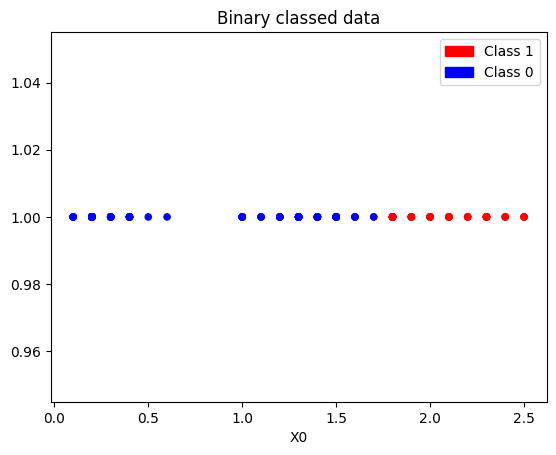

In [26]:
# X,y=random_data(100)
# sorted_indices = np.lexsort((X[:, 1], X[:, 0]))
ind= np.argsort(X,axis=0)
X=np.take_along_axis(X,ind,axis=0)
y=np.take_along_axis(y,ind,axis=0)

# Use sorted indices to rearrange the original array
# X = X[sorted_indices]
# np.sort(X,axis=0)
# np.sort(X,axis=1).


r1=mpatch.Patch(color='red',label='Class 1')
r2=mpatch.Patch(color='blue',label='Class 0')

plot_data(X,np.ones((n,1)),y,'X0','','Binary classed data')
# plot_data(X[:,0:1],X[:,1:2],y,title='Binary classed data')
plt.legend(handles = [r1,r2])
np.count_nonzero(y==0)

In [27]:

y.shape

(150, 1)

In [28]:
ind= np.argsort(X)
ind.reshape(n,)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
x = np.array([3, 1, 2])

np.argsort(X,axis=0)
# X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 29],
       [ 21],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 28],
       [ 20],
       [ 18],
       [ 10],
       [ 17],
       [ 16],
       [ 15],
       [ 14],
       [ 13],
       [ 12],
       [ 11],
       [ 19],
       [  9],
       [  8],
       [  7],
       [  6],
       [  5],
       [ 39],
       [ 40],
       [ 38],
       [ 35],
       [ 36],
       [ 34],
       [ 37],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 56],
       [ 55],
       [ 53],
       [ 54],
       [ 51],
       [ 50],
       [ 52],
       [ 57],
       [ 58],
       [ 59],
       [ 64],
       [ 63],
       [ 62],
       [ 60],
       [ 61],
       [ 72],
       [ 77],
       [ 76],
       [ 75],
       [ 73],
       [ 71],
      

In [45]:
def mse(x1,x2):
    n=x1.shape[0]
    return (0.5/n)*np.sum(np.square((x1-x2)))

def sigmoid(x):
    return (1/(1+np.exp(x)))

def grad(X,y,w,regulariser=None,alpha=0):
    '''1D batch gradient descent''' 
    n,m=X.shape
    A=np.zeros((m,m))
    if regulariser in ['l2','ridge']:
        A=np.eye(m)
        A[0][0]=0
    elif regulariser in ['l1','lasso']:
        pass
    #note: @ means matrix mulitplication (np.matmul)
    h=X@w
    sig=sigmoid(h)-y
    sig=1/(1+np.exp(h))
    sig-=y
    
    return (0.5/n)*((X.T)@(sig)) #gradient vector    
    #
w=np.random.randn(m,1)

a=np.ones((n,1))
X_=np.concatenate((a,X),axis=1)




In [70]:
w

array([[5.6692652 ],
       [7.91248981]])

In [31]:
(X.T)@(X@w)
# (X@w).shape

array([[533.32594576]])

In [148]:
def get_eta_stochastic(t,t0=5,t1=50):
    # t0=np.random.randn()
    # t1=np.random.randn()
    
    return t0/(t+t1)

np.random.seed(0)
def get_weights_stochastic_grad_descent(X,y,*,epochs,t0=5,t1=50,wlist=None,regulariser=None,alpha=0,eta=0.1):
    n,m=X.shape
    w=np.random.randn(m,1)
    # alpha=0.01
    # eta=np.random.randint(100)
    for epoch in range(epochs):
        for i in range(n):

            #  for i in range(iter):
            # w = w - alpha * np.dot(X.T, sigmoid(np.dot(X,w)) - np.reshape(y,(len(y),1)))
            # cost_list[i] = cost(params)

            # eta=get_eta_stochastic(n*epoch+i)
            eta=np.random.uniform(0,eta)
            r=np.random.randint(n)
            learning_rate=get_eta_stochastic(n*epoch+i,t0,t1)
            
            delta_w=grad(X[r:r+1],y[r:r+1],w,regulariser,alpha)
            # print(delta_w.shape)
            w-=eta*delta_w
        if (wlist is not None):
            wlist.append((w[0][0],w[1][0]))
            pass
    return w

# wlist_stochastic=[]
w=get_weights_stochastic_grad_descent(X_,y,epochs=1500)
w

array([[1.76375737],
       [0.40174732]])

In [60]:

np.random.randn(m,1)

array([[1.76405235]])

50 % chance of getting a good boundary


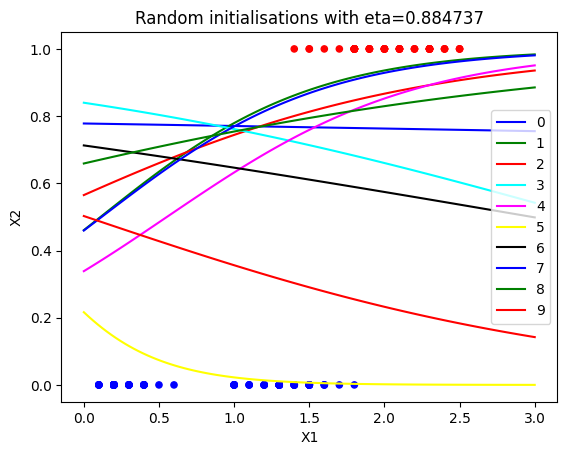

0 0.5013026685615709 75717.8642468047
1 0.5013026685615709 75717.8642468047
2 0.5013026685615709 75717.8642468047
3 0.5013026685615709 75717.8642468047
4 0.5013026685615709 75717.8642468047
5 0.5013026685615709 75717.8642468047
6 0.5013026685615709 75717.8642468047
[[-0.01063218]
 [ 0.60233799]]


In [213]:
X1=np.linspace(0,3,100).reshape(-1,1)
colors_=['red' if val==1 else 'blue' for val in y]
plt.scatter(X,y,c=colors_,s=20)


l=[1,2,3,4,5,6,7,8,9,10]
# w=get_weights_stochastic_grad_descent(X_,y,epochs=100,t0=1, t1=20)
# h=X1@w[1]+w[0]
# sig=sigmoid(h)
# pred=sig
# plt.plot(X1,sig,c='yellow',label='t0=1')
# # print(w)

# w=get_weights_stochastic_grad_descent(X_,y,epochs=100,t0= 2, t1= 30)
# h=X1@w[1]+w[0]
# sig=sigmoid(h)
# pred=sig
# plt.plot(X1,sig,c='green',label='t0=5')
# # print(w)

# w=get_weights_stochastic_grad_descent(X_,y,epochs=100,t0=10, t1= 40)
# h=X1@w[1]+w[0]
# sig=sigmoid(h)
# pred=sig
# plt.plot(X1,sig,c='black',label='t0=10')


# w=get_weights_stochastic_grad_descent(X_,y,epochs=100,eta=0.884737)
# # w=get_weights_stochastic_grad_descent(X_,y,epochs=100,t0=71289.3299375976, t1=  10658.69961755792)
# h=X1@w[1]+w[0]
# sig=sigmoid(h)
# pred=sig
# plt.plot(X1,sig,c='black',label='t0=10')

# colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']


l=[]
k=10
cc=0
for i in range(k):
    # a=np.random.uniform(0,100000)
    # b=np.random.uniform(0,100000)
    # a=np.random.uniform(0,2)
    w=get_weights_stochastic_grad_descent(X_,y,epochs=50,eta=0.884737)
    # w=get_weights_stochastic_grad_descent(X_,y,epochs=50,t0=a, t1= b,eta=0.2)
    
    h=X1@w[1]+w[0]
    sig=sigmoid(h)
    pred=sig
    plt.plot(X1,sig,label=str(i), color=colors[i%7])
    # plt.plot(X1,sig,label=str(i)+" "+str(a), color=colors[i%7])
    # l.append((a,b))
    # l.append()
    
    if (sigmoid(X1[0]@w[1]+w[0])>sigmoid(X1[99]@w[1]+w[0])):
        cc+=1
    # plt.plot(X1,sig,label=str(i)+" "+str(a)+ " "+str(b), color=np.random.rand(3,) )

print(round(100*cc/k),"% chance of getting a good boundary")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Random initialisations with eta=0.884737")

plt.show()

for i in range(7):
    print(i,l[i][0],l[i][1])

print(w)



In [191]:
X[149]

array([2.5])

In [193]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [194]:
w=np.array(( log_reg.intercept_[0],log_reg.coef_[0][0])).reshape(-1,1)
w

array([[-7.1947083],
       [ 4.3330846]])

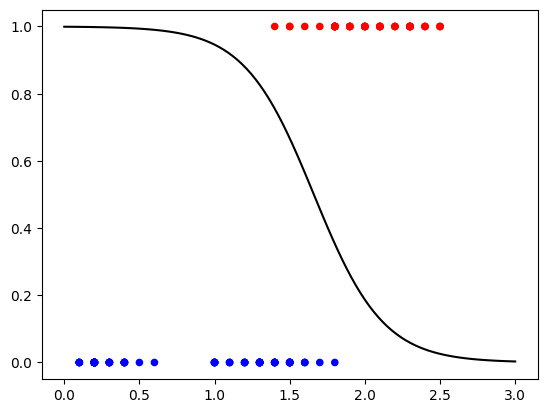

In [195]:
X1=np.linspace(0,3,100).reshape(-1,1)
colors_=['red' if val==1 else 'blue' for val in y]
plt.scatter(X,y,c=colors_,s=20)
plt.plot(X1,sigmoid(X1@w[1]+w[0]),c='black',label='t0=10')

In [ ]:
X_.shape

(150, 2)

[[-39.57734195]
 [-32.61241105]]
[[-38.56021515]
 [-29.99679219]]
[[15.88818561]
 [34.85505636]]


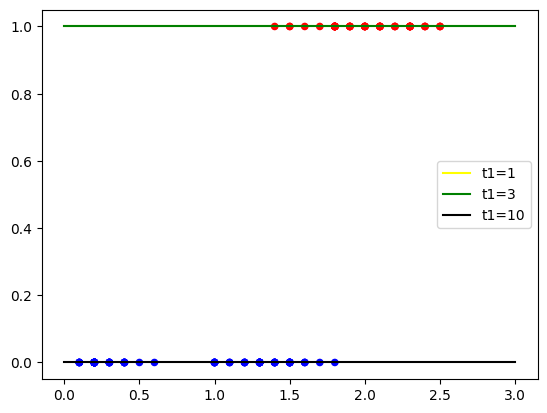

In [ ]:
X1=np.linspace(0,3,100).reshape(-1,1)
colors_=['red' if val==1 else 'blue' for val in y]
plt.scatter(X,y,c=colors_,s=20)

w=get_weights_stochastic_grad_descent(X_,y,epochs=100,t1=1)
h=X1@w[1]+w[0]
sig=sigmoid(h)
pred=sig
plt.plot(X1,sig,c='yellow',label='t1=1')
# print(w)

w=get_weights_stochastic_grad_descent(X_,y,epochs=100,t1=3)
h=X1@w[1]+w[0]
sig=sigmoid(h)
pred=sig
plt.plot(X1,sig,c='green',label='t1=3')
# print(w)

w=get_weights_stochastic_grad_descent(X_,y,epochs=100,t1=10)
h=X1@w[1]+w[0]
sig=sigmoid(h)
pred=sig
plt.plot(X1,sig,c='black',label='t1=10')
# print(w)

plt.legend()
plt.title("Effect of t1")




In [ ]:
w

array([[17.21502123],
       [36.78406485]])

In [ ]:
(X1@w[1]+w[0]).shape

(100,)

In [ ]:
X1.shape

(100, 1)

Text(0.2, 0.002, 'Above the boundary: red \n,below the boundary : blue')

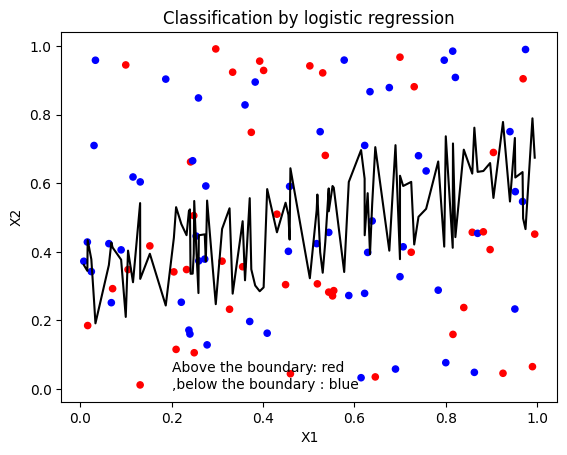

In [ ]:
plot_data(X[:,0:1],X[:,1:2],y,title='Classification by logistic regression')
plt.plot(X[:,0:1],sig,c='black')
plt.text(0.2,0.002,"Above the boundary: red \n,below the boundary : blue")

In [ ]:
prob.shape

(100, 2)